# Model Implementation

#### Management have decided to utilise the ARIMA and ETS models for the forecasting, so your Team is expected to Research, Analyse and Determine the appropriate measurements to apply to your ARIMA and ETS models and describe and analyse the errors for both models.

### Import the necessary libraries

In [41]:
#Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Load and Prepare Data

In [42]:
data = pd.read_csv('clean_monthly_sales_data.csv')
data.head()


,Category,Month,Monthly Sales,Year,DayOfWeek,Platform,Holiday,Promotion,Quarter
0,Sports,1,108592,2002,1,Xbox,1,0,1
1,RPG,2,129387,2002,4,Nintendo,0,0,1
2,Sports,3,114777,2002,4,PC,0,0,1
3,Sports,4,71738,2002,0,Nintendo,0,0,2
4,Simulation,5,142512,2002,2,PlayStation,0,0,2


In [43]:
# Ensure Date format and set index
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(Day=1))
data.set_index('Date', inplace=True)

In [44]:
# Aggregate Monthly Sales (if multiple entries per month exist)
monthly_sales = data.groupby(data.index)['Monthly Sales'].sum()

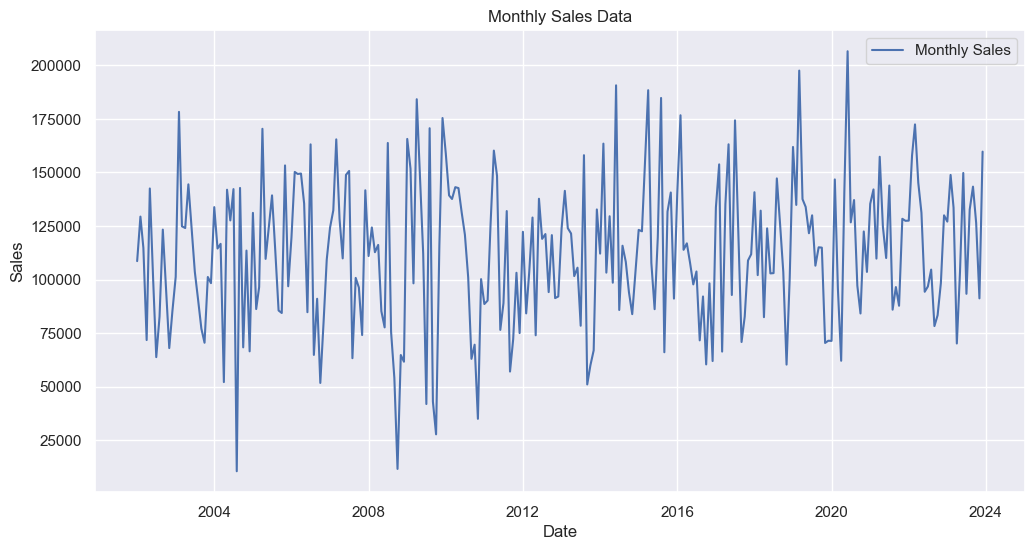

In [45]:
# Plot the Monthly Sales
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Monthly Sales')
plt.title("Monthly Sales Data")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

### Split the dataset into training and testing

In [46]:
# Train-Test Split
train_size = int(len(monthly_sales) * 0.8)  # 80% Training, 20% Test
train, test = monthly_sales[:train_size], monthly_sales[train_size:]

### ARIMA Model Fitting

In [77]:
arima_order = (1, 1, 1)

print("Training ARIMA Model...")
arima_model = ARIMA(train, order=arima_order)
arima_result = arima_model.fit()
print(arima_result.summary())

Training ARIMA Model...
                               SARIMAX Results                                
Dep. Variable:          Monthly Sales   No. Observations:                  211
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2500.119
Date:                Mon, 16 Dec 2024   AIC                           5006.238
Time:                        00:08:50   BIC                           5016.279
Sample:                    01-01-2002   HQIC                          5010.297
                         - 07-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1298      0.081      1.610      0.107      -0.028       0.288
ma.L1         -0.9886      0.038    -25.681      0.000      -1.064      -0.913
sigma2      1.476e+09   1.84

### Forecasting with ARIMA

In [78]:
arima_forecast = arima_result.forecast(steps=len(test))

In [79]:
# Evaluate ARIMA Model
arima_rmse = np.sqrt(mean_squared_error(test, arima_forecast))
print(f"ARIMA RMSE: {arima_rmse:.2f}")

ARIMA RMSE: 29952.44


### ETS Model Fitting

In [80]:
print("Training ETS Model...")
ets_model = ExponentialSmoothing(train, trend="additive", seasonal="additive", seasonal_periods=12)
ets_result = ets_model.fit()

Training ETS Model...


In [81]:
# Forecasting with ETS
ets_forecast = ets_result.forecast(steps=len(test))

In [82]:
# Evaluate ETS Model
ets_rmse = np.sqrt(mean_squared_error(test, ets_forecast))
print(f"ETS RMSE: {ets_rmse:.2f}")

ETS RMSE: 31772.05


### Compare Models

In [83]:
print("Model Comparison:")
print(f"ARIMA RMSE: {arima_rmse:.2f}")
print(f"ETS RMSE: {ets_rmse:.2f}")

Model Comparison:
ARIMA RMSE: 29952.44
ETS RMSE: 31772.05


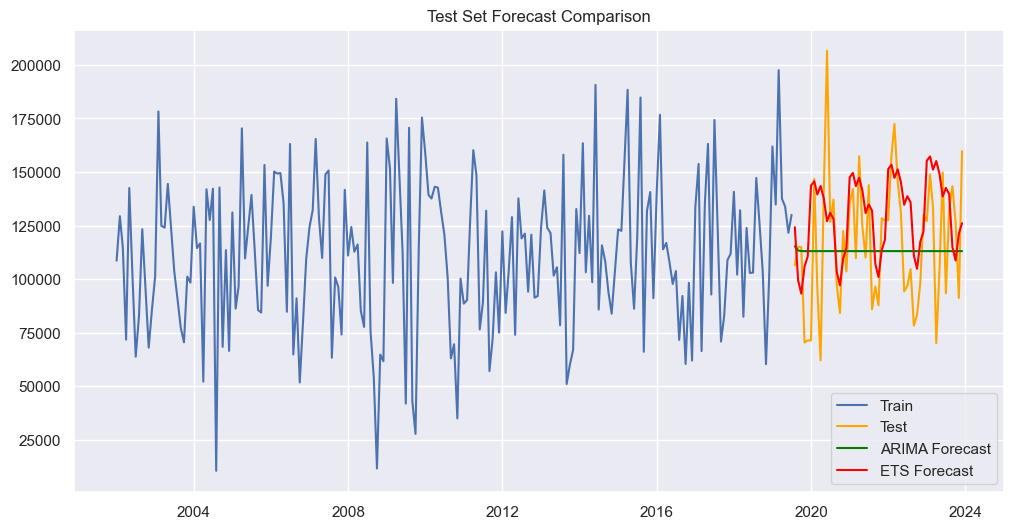

In [84]:
# Plot Test Forecast
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='orange')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='green')
plt.plot(test.index, ets_forecast, label='ETS Forecast', color='red')
plt.title("Test Set Forecast Comparison")
plt.legend()
plt.show()

### Forecast Next 4 Months

In [85]:
best_model = "ARIMA" if arima_rmse < ets_rmse else "ETS"
print(f"Best Model: {best_model}")

if best_model == "ARIMA":
    final_forecast = arima_result.forecast(steps=4)
else:
    final_forecast = ets_result.forecast(steps=4)

Best Model: ARIMA


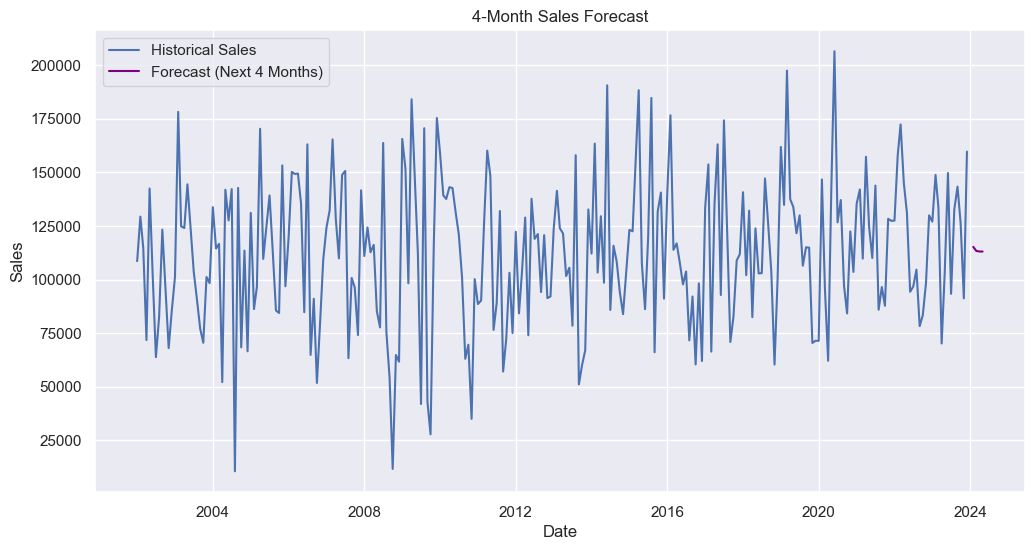

4-Month Forecast:
2019-08-01    115251.851208
2019-09-01    113341.498836
2019-10-01    113093.627525
2019-11-01    113061.465822
Freq: MS, Name: predicted_mean, dtype: float64


In [86]:
forecast_dates = pd.date_range(start=monthly_sales.index[-1] + pd.DateOffset(months=1), periods=4, freq='M')

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Historical Sales')
plt.plot(forecast_dates, final_forecast, label='Forecast (Next 4 Months)', color='purple')
plt.title("4-Month Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

print("4-Month Forecast:")
print(final_forecast)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=4823.616, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=4786.371, Time=0.16 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=4771.282, Time=0.15 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=4822.316, Time=0.05 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=4825.199, Time=0.05 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=4772.210, Time=0.28 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=4772.827, Time=0.63 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=4786.797, Time=0.17 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=4772.789, Time=1.45 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=4770.250, Time=0.15 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=4770.514, Time=0.25 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=4771.401, Time=0.34 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=4785.061, Time=0.13 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=4771.562, Time=0.98 sec
 ARIMA(1,0,0)(0,1,1

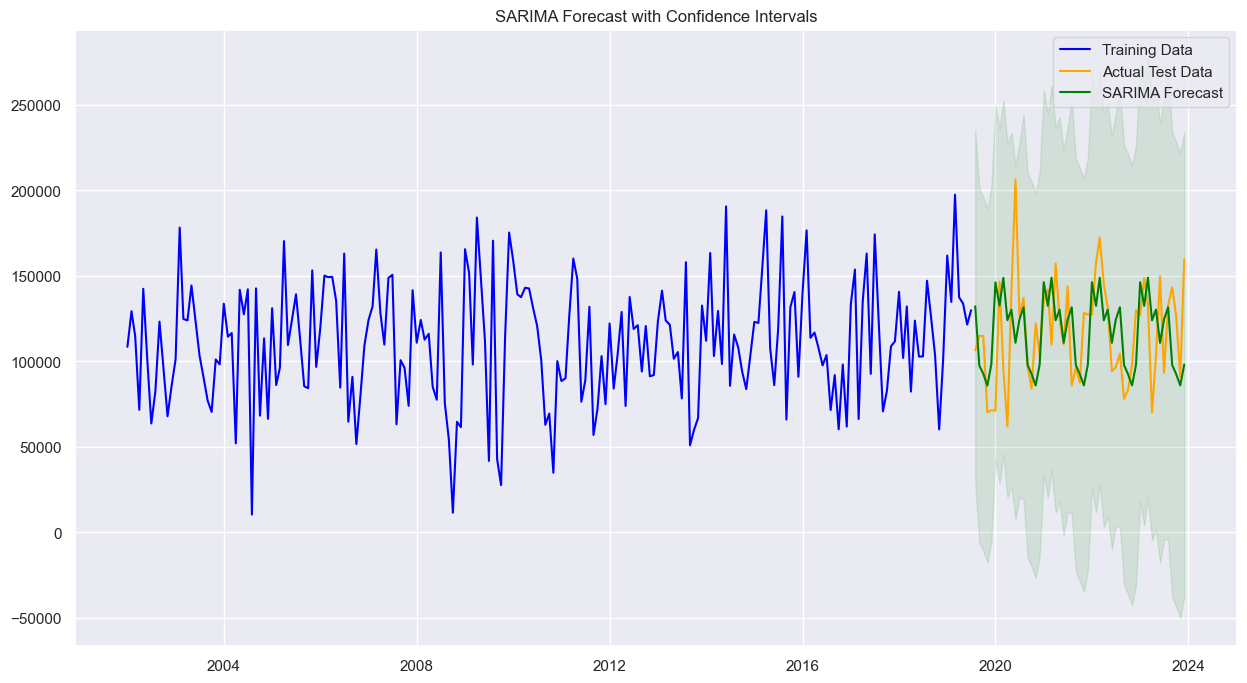

In [91]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from pmdarima import auto_arima

def implement_sarima(data, train_size=0.8):
    """
    Implement SARIMA model with automatic parameter selection and diagnostics
    """
    # Create datetime index
    data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(Day=1))
    data = data.set_index('Date')
    time_series = data['Monthly Sales']
    
    # Split into train and test
    train_size = int(len(time_series) * train_size)
    train = time_series[:train_size]
    test = time_series[train_size:]
    
    # Use auto_arima to find optimal parameters
    auto_model = auto_arima(train,
                           seasonal=True,
                           m=12,  # monthly seasonality
                           start_p=0, start_q=0,
                           max_p=3, max_q=3,
                           start_P=0, start_Q=0,
                           max_P=2, max_Q=2,
                           D=1, max_D=1,
                           trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)
    
    order = auto_model.order
    seasonal_order = auto_model.seasonal_order
    
    # Fit SARIMA model
    model = SARIMAX(train,
                    order=order,
                    seasonal_order=seasonal_order,
                    enforce_stationarity=False,
                    enforce_invertibility=False)
    
    results = model.fit()
    
    # Make predictions
    forecast = results.get_forecast(steps=len(test))
    forecast_mean = forecast.predicted_mean
    forecast_ci = forecast.conf_int()
    
    # Calculate error metrics
    mse = mean_squared_error(test, forecast_mean)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test, forecast_mean)
    mape = np.mean(np.abs((test - forecast_mean) / test)) * 100
    
    # Plot results
    plt.figure(figsize=(15, 8))
    plt.plot(train.index, train, label='Training Data', color='blue')
    plt.plot(test.index, test, label='Actual Test Data', color='orange')
    plt.plot(test.index, forecast_mean, label='SARIMA Forecast', color='green')
    plt.fill_between(test.index,
                     forecast_ci.iloc[:, 0],
                     forecast_ci.iloc[:, 1],
                     color='green',
                     alpha=0.1)
    plt.title('SARIMA Forecast with Confidence Intervals')
    plt.legend()
    plt.grid(True)
    
    return {
        'model': results,
        'forecast': forecast_mean,
        'confidence_intervals': forecast_ci,
        'metrics': {
            'RMSE': rmse,
            'MAE': mae,
            'MAPE': mape
        },
        'parameters': {
            'order': order,
            'seasonal_order': seasonal_order
        }
    }

# Load and prepare your data (assuming it's already in a DataFrame called 'data')
# Sort the data by date to ensure proper time series ordering
data = data.sort_values(['Year', 'Month'])

# Run the SARIMA implementation
results = implement_sarima(data)

# Print the results
print("\nModel Parameters:")
print(f"SARIMA Order: {results['parameters']['order']}")
print(f"Seasonal Order: {results['parameters']['seasonal_order']}")
print("\nModel Metrics:")
print(f"RMSE: {results['metrics']['RMSE']:.2f}")
print(f"MAE: {results['metrics']['MAE']:.2f}")
print(f"MAPE: {results['metrics']['MAPE']:.2f}%")

# Show the plot
plt.show()

Starting SARIMA analysis...
Finding best SARIMA parameters...
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=293.832, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=228.474, Time=0.22 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=194.696, Time=0.46 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=292.036, Time=0.05 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=295.186, Time=0.09 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=196.547, Time=0.60 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=228.541, Time=0.24 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=193.613, Time=0.26 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=195.423, Time=0.36 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=227.460, Time=0.26 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=194.631, Time=0.42 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.17 sec
 ARIMA(0,0,0)(0,1,1)[12]             : AIC=193.430, Time=0.19 sec
 ARIMA(0,0,0)(1,1,1)[12]             : AI

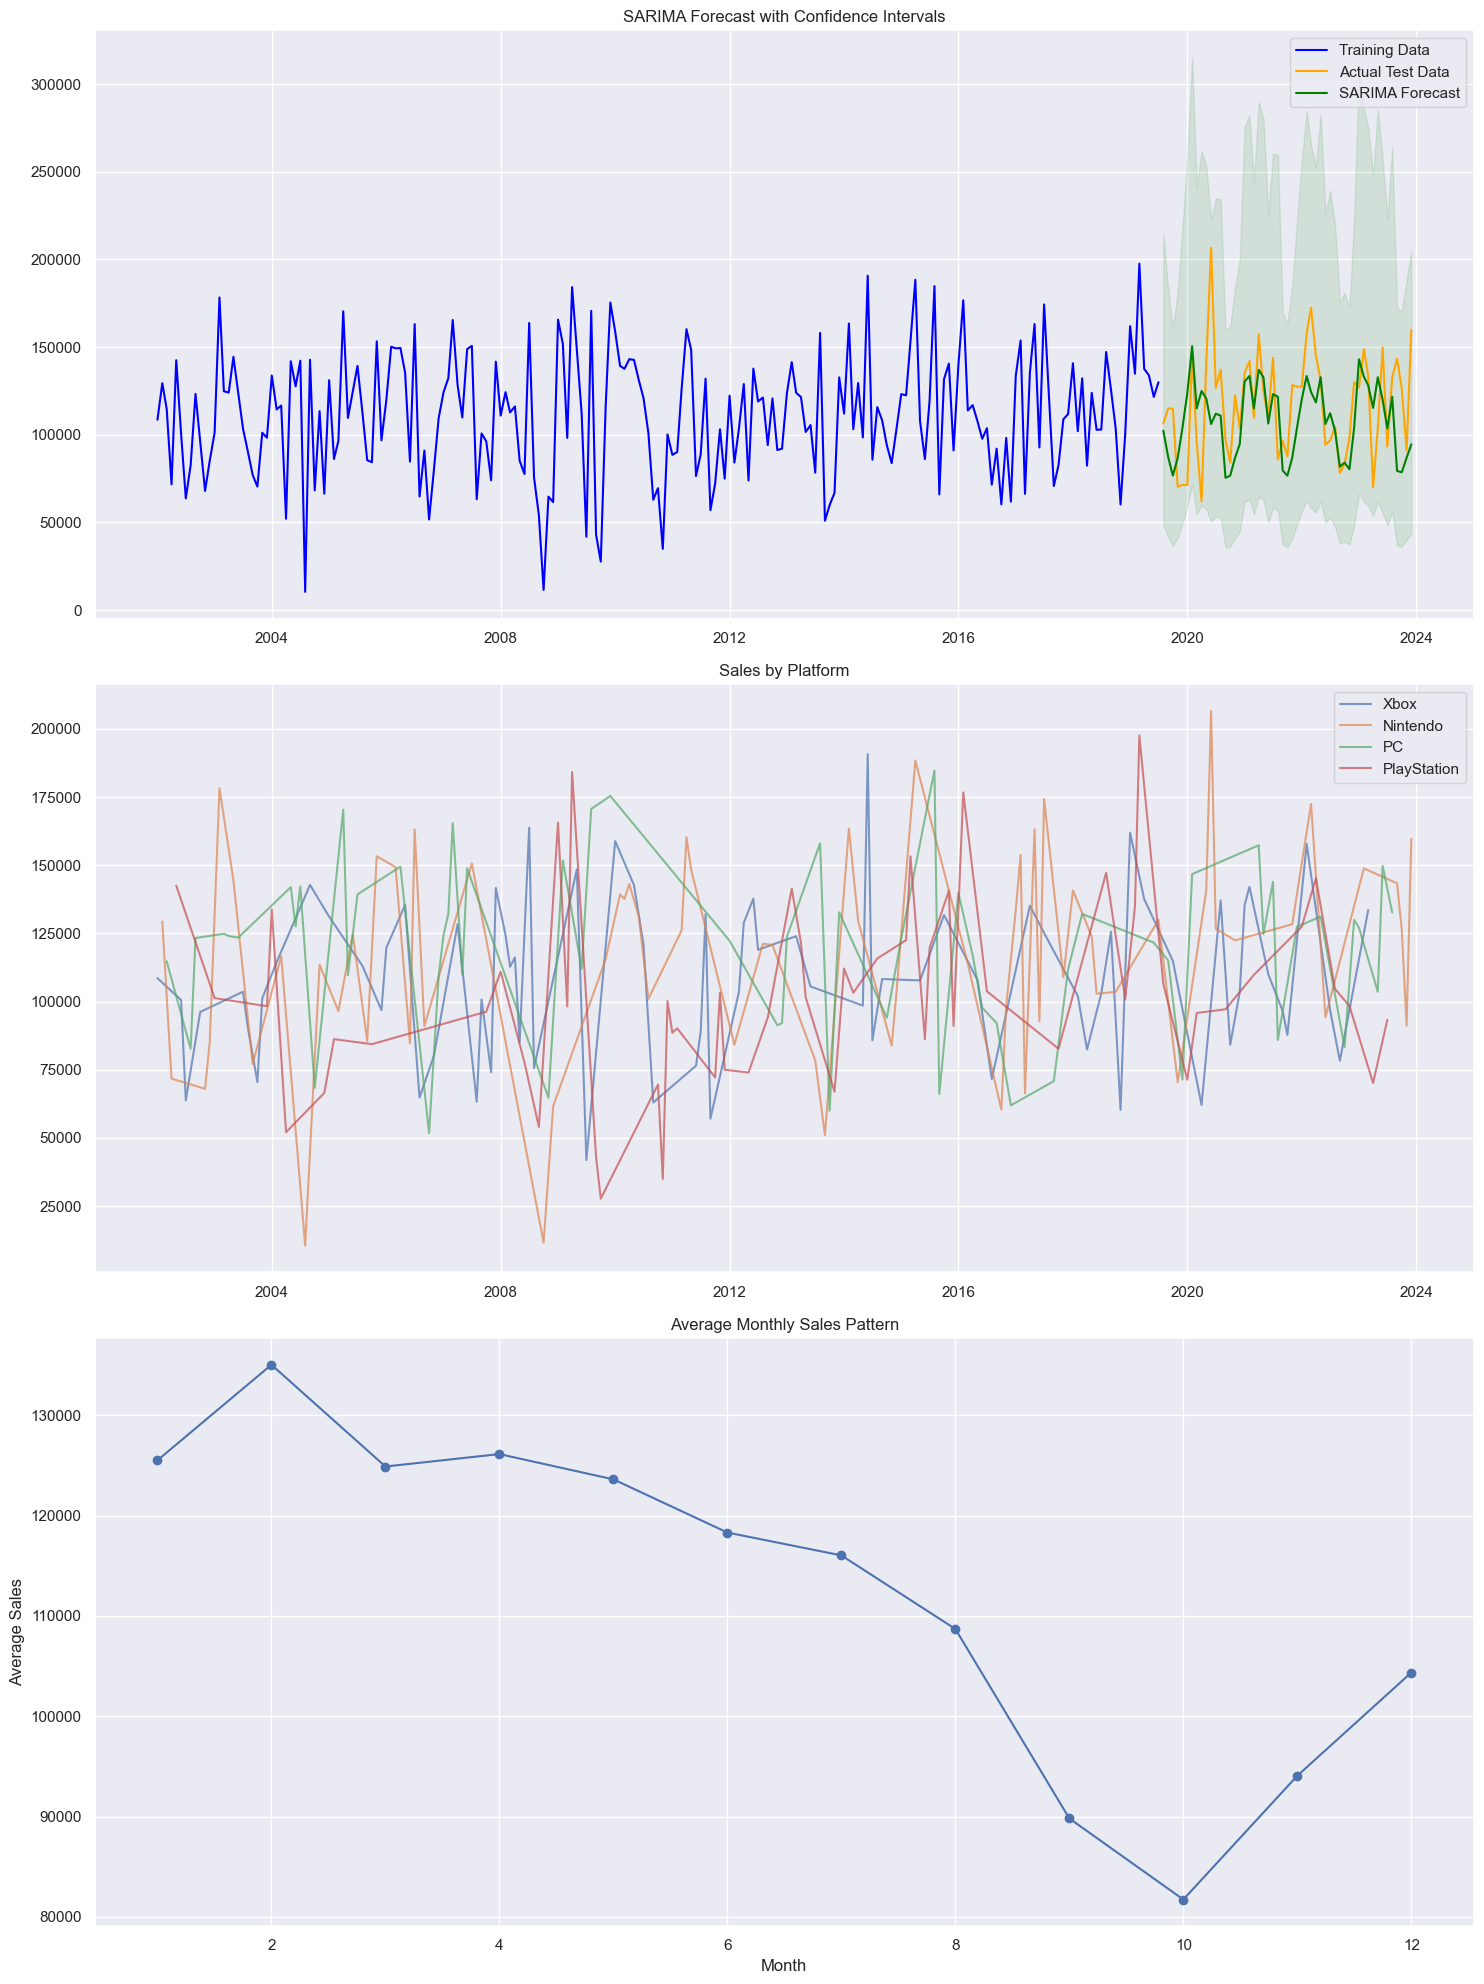

In [93]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.preprocessing import LabelEncoder

def implement_improved_sarima(data, train_size=0.8):
    """
    Implement improved SARIMA model with external regressors and transformations
    """
    # Create a copy of the data to avoid modifying the original
    df = data.copy()
    
    # Convert Monthly Sales to numeric
    df['Monthly Sales'] = pd.to_numeric(df['Monthly Sales'])
    
    # Create datetime index
    df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(Day=1))
    df = df.sort_values('Date')
    
    # Create external regressors
    le = LabelEncoder()
    df['Platform_encoded'] = le.fit_transform(df['Platform'])
    
    # Ensure numeric types for categorical variables
    df['Holiday'] = df['Holiday'].astype(int)
    df['Promotion'] = df['Promotion'].astype(int)
    df['Quarter'] = df['Quarter'].astype(int)
    
    # Create dummy variables for quarters
    quarter_dummies = pd.get_dummies(df['Quarter'], prefix='Quarter')
    
    # Create dummy variables for platforms
    platform_dummies = pd.get_dummies(df['Platform'], prefix='Platform')
    
    # Combine all external regressors
    exog_variables = pd.concat([
        platform_dummies,
        quarter_dummies,
        df[['Holiday', 'Promotion']]
    ], axis=1).astype(float)  # Convert all to float
    
    # Log transform the target variable to handle variance
    time_series = np.log1p(df['Monthly Sales'])
    
    # Split into train and test sets
    train_size = int(len(time_series) * train_size)
    train = time_series[:train_size]
    test = time_series[train_size:]
    exog_train = exog_variables[:train_size]
    exog_test = exog_variables[train_size:]
    
    print("Finding best SARIMA parameters...")
    # Find optimal parameters with auto_arima
    auto_model = auto_arima(train,
                           exogenous=exog_train,
                           seasonal=True,
                           m=12,
                           start_p=0, start_q=0,
                           max_p=2, max_q=2,
                           start_P=0, start_Q=0,
                           max_P=1, max_Q=1,
                           D=1, max_D=1,
                           trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)
    
    order = auto_model.order
    seasonal_order = auto_model.seasonal_order
    
    print("Fitting SARIMA model...")
    # Fit SARIMA model
    model = SARIMAX(train,
                    exog=exog_train,
                    order=order,
                    seasonal_order=seasonal_order,
                    enforce_stationarity=False,
                    enforce_invertibility=False)
    
    results = model.fit()
    
    # Make predictions
    forecast = results.get_forecast(steps=len(test), exog=exog_test)
    forecast_mean = forecast.predicted_mean
    forecast_ci = forecast.conf_int()
    
    # Transform predictions back to original scale
    forecast_mean = np.expm1(forecast_mean)
    forecast_ci = np.expm1(forecast_ci)
    actual_test = np.expm1(test)
    actual_train = np.expm1(train)
    
    # Calculate error metrics
    mse = mean_squared_error(actual_test, forecast_mean)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual_test, forecast_mean)
    mape = np.mean(np.abs((actual_test - forecast_mean) / actual_test)) * 100
    
    # Create plots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 20))
    
    # Plot 1: Overall forecast
    ax1.plot(df['Date'][:train_size], actual_train, label='Training Data', color='blue')
    ax1.plot(df['Date'][train_size:], actual_test, label='Actual Test Data', color='orange')
    ax1.plot(df['Date'][train_size:], forecast_mean, label='SARIMA Forecast', color='green')
    ax1.fill_between(df['Date'][train_size:],
                     forecast_ci.iloc[:, 0],
                     forecast_ci.iloc[:, 1],
                     color='green',
                     alpha=0.1)
    ax1.set_title('SARIMA Forecast with Confidence Intervals')
    ax1.legend()
    ax1.grid(True)
    
    # Plot 2: Platform-wise analysis
    for platform in df['Platform'].unique():
        platform_data = df[df['Platform'] == platform]
        ax2.plot(platform_data['Date'], platform_data['Monthly Sales'], 
                label=platform, alpha=0.7)
    ax2.set_title('Sales by Platform')
    ax2.legend()
    ax2.grid(True)
    
    # Plot 3: Seasonal patterns
    seasonal_avg = df.groupby('Month')['Monthly Sales'].mean()
    ax3.plot(seasonal_avg.index, seasonal_avg.values, marker='o')
    ax3.set_title('Average Monthly Sales Pattern')
    ax3.set_xlabel('Month')
    ax3.set_ylabel('Average Sales')
    ax3.grid(True)
    
    plt.tight_layout()
    
    # Calculate additional metrics
    platform_performance = df.groupby('Platform')['Monthly Sales'].agg(['mean', 'std']).round(2)
    seasonal_impact = df.groupby('Quarter')['Monthly Sales'].mean().round(2)
    promotion_impact = df.groupby('Promotion')['Monthly Sales'].mean().round(2)
    
    return {
        'model': results,
        'forecast': forecast_mean,
        'confidence_intervals': forecast_ci,
        'metrics': {
            'RMSE': rmse,
            'MAE': mae,
            'MAPE': mape
        },
        'parameters': {
            'order': order,
            'seasonal_order': seasonal_order
        },
        'analysis': {
            'platform_performance': platform_performance,
            'seasonal_impact': seasonal_impact,
            'promotion_impact': promotion_impact
        }
    }

# Run the improved model
print("Starting SARIMA analysis...")
results = implement_improved_sarima(data)

# Print comprehensive results
print("\nModel Parameters:")
print(f"SARIMA Order: {results['parameters']['order']}")
print(f"Seasonal Order: {results['parameters']['seasonal_order']}")

print("\nModel Metrics:")
print(f"RMSE: {results['metrics']['RMSE']:.2f}")
print(f"MAE: {results['metrics']['MAE']:.2f}")
print(f"MAPE: {results['metrics']['MAPE']:.2f}%")

print("\nPlatform Performance:")
print(results['analysis']['platform_performance'])

print("\nQuarterly Impact:")
print(results['analysis']['seasonal_impact'])

print("\nPromotion Impact:")
print(results['analysis']['promotion_impact'])

plt.show()